In [1]:
# dependencies
import csv
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn import svm
# from sklearn.naive_bayes import ComplementNB, MultinomialNB
import numpy as np
from scipy.stats import uniform, norm
from sklearn.metrics import plot_confusion_matrix
from imblearn.over_sampling import SMOTE, RandomOverSampler

import warnings
warnings.filterwarnings('ignore')

In [2]:
def extract_data(filename,with_label=True):
    data = []    
    f = open(filename,"r")
    d_reader = csv.reader(f,delimiter=",",quotechar="\"")
    first = True
    for line in d_reader:
        if first:
            first = False
            continue
        data.append(line)
    print(np.shape(data))
    col_count = 324
    x_train = np.empty((0,col_count))
    y_train = np.array([])

    for line in data:
        if with_label:
            x_train = np.append(x_train,np.array(list(map(float,line[1:-2]))).reshape((1,col_count)),axis=0)
            y_train = np.append(y_train,int(line[-1]))
        else:
            x_train = np.append(x_train,np.array(list(map(float,line[1:6]+line[8:]))).reshape((1,col_count)),axis=0)
    print(x_train.shape)
    print(y_train.shape)
    if with_label:
        return x_train, y_train
    else:
        return x_train
    #print(y_train)

In [3]:
x_train, y_train = extract_data("TrainingSet (Labeled Only).csv")

(246, 327)
(246, 324)
(246,)


In [5]:
rand_seed = 3454132

oversampler = SMOTE(sampling_strategy="not majority",random_state=rand_seed)

x_smote, y_smote = oversampler.fit_resample(x_train,y_train)

print(x_smote.shape,y_smote.shape)

oversampler = RandomOverSampler(sampling_strategy="not majority",\
                                random_state=rand_seed)

x_os, y_os = oversampler.fit_resample(x_train,y_train)

print(x_os.shape,y_os.shape)

(480, 339) (480,)
(480, 339) (480,)


In [6]:
"""
Trains a model using the given data and a hyperparameter search object

Parameters:
x_train - input data
y_train - target labels for data
hp_search - model_selection object

Returns: best estimator for the given data given the model selector
"""
def train_model(x_train,y_train,hp_search):
    hp_search.fit(x_train,y_train)
    print("Best Score: {:.4f}".format(hp_search.best_score_))
    for k,v in hp_search.best_params_.items():
        print("{} => {}".format(k,v))
    print("Splits: {}".format(hp_search.n_splits_))
    y_out = hp_search.predict(x_train)
    print("Accuracy: {:.4f}%".format(np.mean(y_out == y_train) * 100.0))
    return hp_search.best_estimator_

In [7]:
"""
Trains and prints the result of the training and model selection.

Parameters:
name - name of the test run
x_train - input data
y_train - target labels for data
model_selector - model_selection object
"""
def print_res(name,x_train,y_train,model_selector):
    print("{}:".format(name))
    train_model(x_train,y_train,model_selector)

    # display confusion matrix
    disp = plot_confusion_matrix(model_selector, x_train, y_train,
                                 display_labels=["Calm","Cheerful","Bravery",\
                                                 "Fearful","Sadness","Love"],
                                 cmap=plt.cm.Blues,
                                 normalize='true')
    # print(y_out)

In [7]:
# SVM, Grid Search
k_folds = 5
random_search_iterations = 200
rand_seed = 3249807

parameters = {
    'C': np.logspace(-3, 2, 6), 
    'gamma': np.logspace(-3, 2, 6), 
    'kernel':['linear', 'rbf', 'sigmoid', 'poly'], 
    'shrinking':[True, False], 
    'probability':[True, False]
}

svmc = svm.SVC()
random_search_svm = RandomizedSearchCV(svmc, parameters,\
                                       random_state=rand_seed,\
                                       n_iter=random_search_iterations,\
                                       cv=k_folds,n_jobs=-1)

Vanilla:
Best Score: 0.2997
shrinking => False
probability => False
kernel => sigmoid
gamma => 0.001
C => 1.0
Splits: 5
Accuracy: 29.9625%


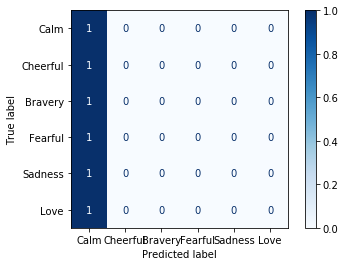

In [9]:
print_res("Vanilla",x_train,y_train,random_search_svm)

Random Oversampling:
Best Score: 0.7792
shrinking => True
probability => True
kernel => rbf
gamma => 0.001
C => 100.0
Splits: 5
Accuracy: 100.0000%


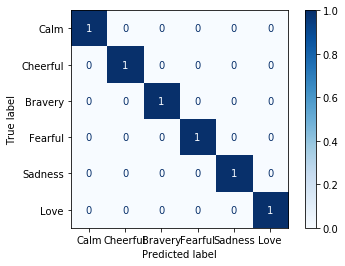

In [10]:
print_res("Random Oversampling",x_os,y_os,random_search_svm)

SMOTE:
Best Score: 0.1667
shrinking => False
probability => False
kernel => sigmoid
gamma => 0.001
C => 1.0
Splits: 5
Accuracy: 16.6667%


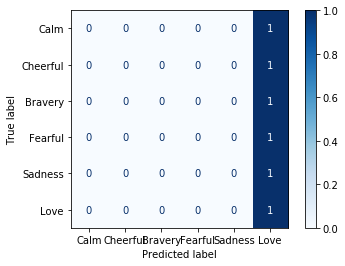

In [11]:
print_res("SMOTE",x_smote,y_smote,random_search_svm)

In [8]:
# LinearSVM, Grid Search
k_folds = 5
random_search_iterations = 100
rand_seed = 3249807

parameters = {
    'penalty':['l1', 'l2'],
    'loss':['hinge', 'squared_hinge'], 
    'dual':[True, False], 
    'C': np.logspace(-3, 2, 6), 
    'multi_class':['ovr', 'crammer_singer'], 
    'max_iter':[100, 150, 200]
}

linearsvm = svm.LinearSVC()
random_search_linear = RandomizedSearchCV(linearsvm, parameters,\
                                          random_state=rand_seed,\
                                          n_iter=random_search_iterations,\
                                          cv=k_folds,n_jobs=-1)

In [ ]:
print_res("Vanilla",x_train,y_train,random_search_linear)

Vanilla:


In [ ]:
print_res("Random Oversampling",x_os,y_os,random_search_linear)

In [ ]:
print_res("SMOTE",x_smote,y_smote,random_search_linear)